# Coupon Acceptance Project by Mukhtar Ahmad 



### Importing the required libraries for the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split ,cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

import warnings
warnings.filterwarnings('ignore')



### Load the dataset

In [2]:
coupon_df = pd.read_csv("Coupan_data.csv")
coupon_df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [3]:
#  check for shape , size and dimension of dataset
coupon_df.shape , coupon_df.size ,coupon_df.ndim


((12684, 25), 317100, 2)

In [4]:
coupon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

## Preprocessing the data

In [5]:
# dropping the duplicate values
pd.set_option("display.max_columns",25)
coupon_df.drop_duplicates()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


In [6]:
# Check for Null values
round(((coupon_df.isnull().sum())/coupon_df.shape[0] *100),2)  # checking the null values in percentage rounded to 2 decimal points

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Accept(Y/N?)             0.00
dtype: float64

In [7]:
coupon_df.drop("car", axis=1, inplace= True)  # car column is having 99 percent null entries hence dropping the column

In [8]:
# All below columns are categorical in nature in filling the missing values with mode of the data column
fill_column= ["Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]
for col in fill_column:
    coupon_df[col].fillna(coupon_df[col].mode()[0], inplace = True)
    

In [9]:
 # checking the null values in percentage rounded to 2 decimal points
round(((coupon_df.isnull().sum())/coupon_df.shape[0] *100),2) 

destination             0.0
passanger               0.0
weather                 0.0
temperature             0.0
coupon                  0.0
expiration              0.0
gender                  0.0
age                     0.0
maritalStatus           0.0
has_children            0.0
education               0.0
occupation              0.0
income                  0.0
Bar                     0.0
CoffeeHouse             0.0
CarryAway               0.0
RestaurantLessThan20    0.0
Restaurant20To50        0.0
toCoupon_GEQ5min        0.0
toCoupon_GEQ15min       0.0
toCoupon_GEQ25min       0.0
direction_same          0.0
direction_opp           0.0
Accept(Y/N?)            0.0
dtype: float64

In [10]:
# to check any single value column
[col for col in coupon_df if (coupon_df[col].nunique()<2)] 

['toCoupon_GEQ5min']

In [11]:
#  dropping the single value column
coupon_df.drop("toCoupon_GEQ5min", axis=1 , inplace=True) 

In [12]:
coupon_df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1,0


In [13]:
# checking the correlation between numerical columns
coupon_df.corr(numeric_only=True)

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
temperature,1.000000,-0.019716,-0.155332,-0.216254,0.097085,-0.097085,0.061240
has_children,-0.019716,1.000000,0.078211,-0.013722,-0.031620,0.031620,-0.045557
toCoupon_GEQ15min,-0.155332,0.078211,1.000000,0.324984,-0.303533,0.303533,-0.081602
toCoupon_GEQ25min,-0.216254,-0.013722,0.324984,1.000000,-0.192319,0.192319,-0.103633
direction_same,0.097085,-0.031620,-0.303533,-0.192319,1.000000,-1.000000,0.014570
direction_opp,-0.097085,0.031620,0.303533,0.192319,-1.000000,1.000000,-0.014570
Accept(Y/N?),0.061240,-0.045557,-0.081602,-0.103633,0.014570,-0.014570,1.000000


In [14]:
# dropping the highly correlated columns, column "direction_same" and "direction_opp" are highly correlated and inverse to each other,hence dropping one column
coupon_df.drop("direction_opp", axis=1, inplace=True)

In [15]:
coupon_df.head(2)

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0


In [16]:
# rename few columns (spelling correction and for easy processing )

coupon_df.rename(columns={"passanger" : "passenger","Accept(Y/N?)":"Accept"},inplace=True)

In [17]:
coupon_df.head(2)

,destination,passenger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Accept
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0


In [18]:
# check for labeled data is balanced or imbalanced data
coupon_df.Accept.value_counts(normalize=True)
# dataset is not highly imbalanced hence we are not trying to balance the dataset

Accept
1    0.568433
0    0.431567
Name: proportion, dtype: float64

### Exploratory Data Analysis

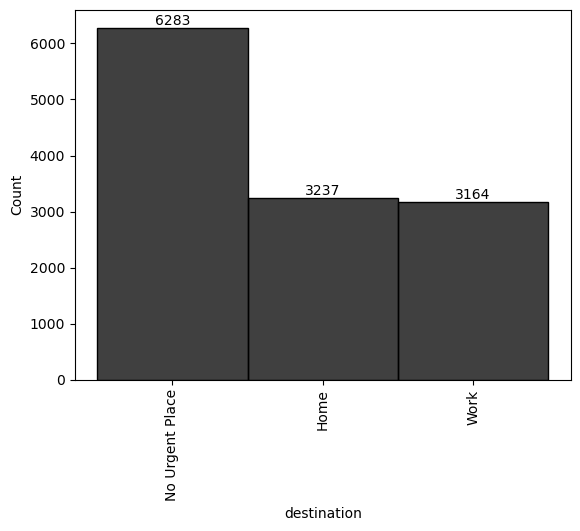

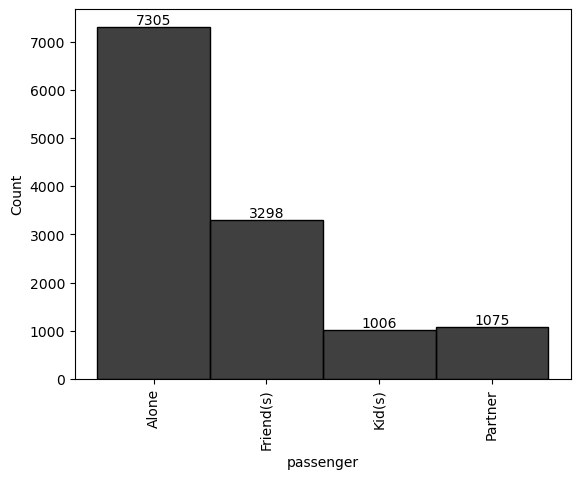

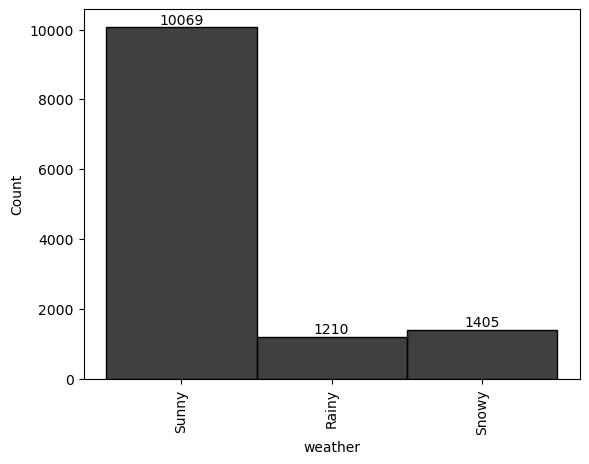

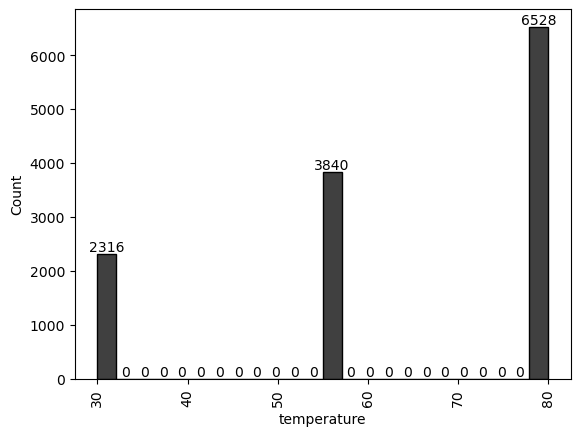

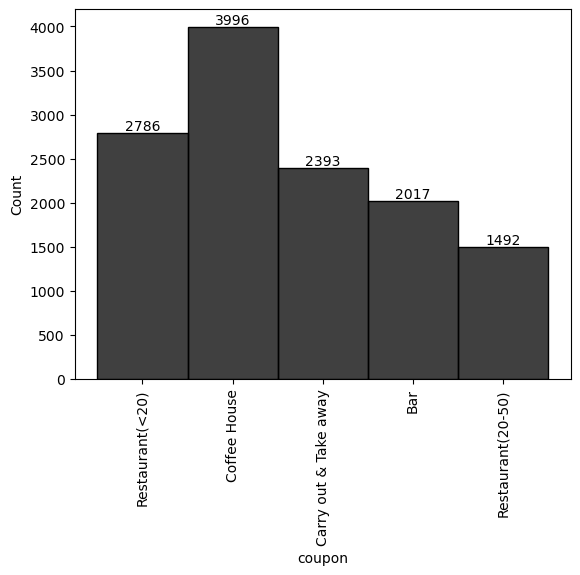

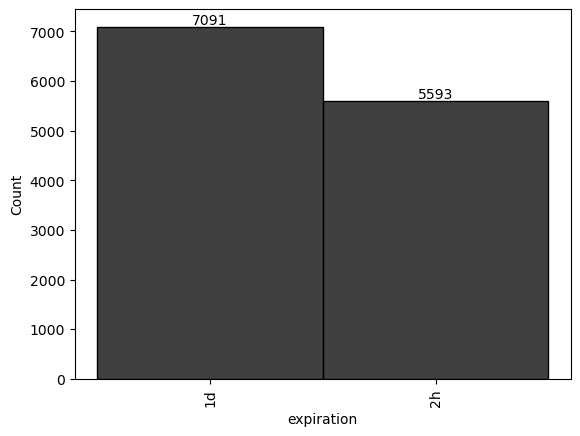

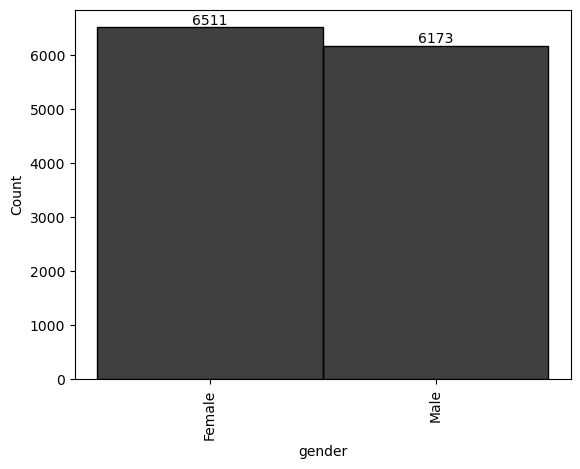

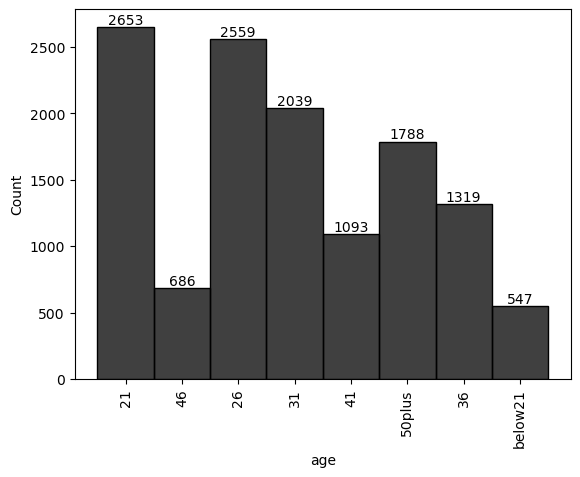

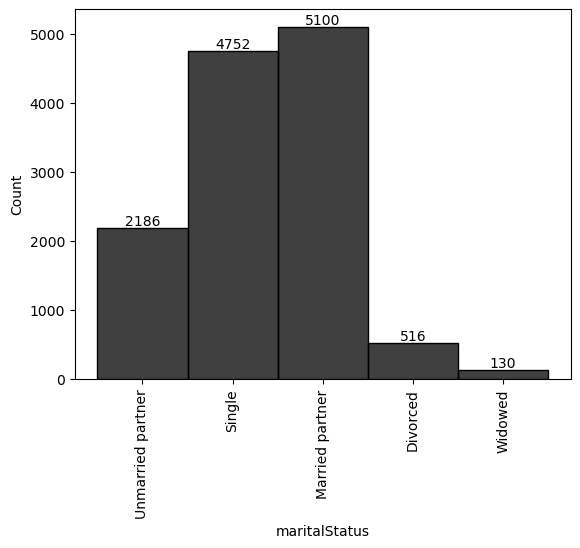

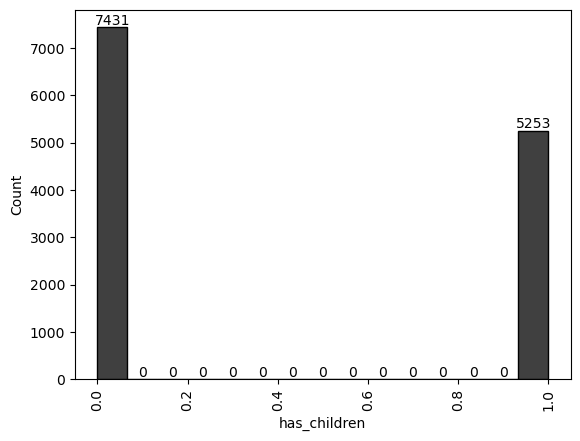

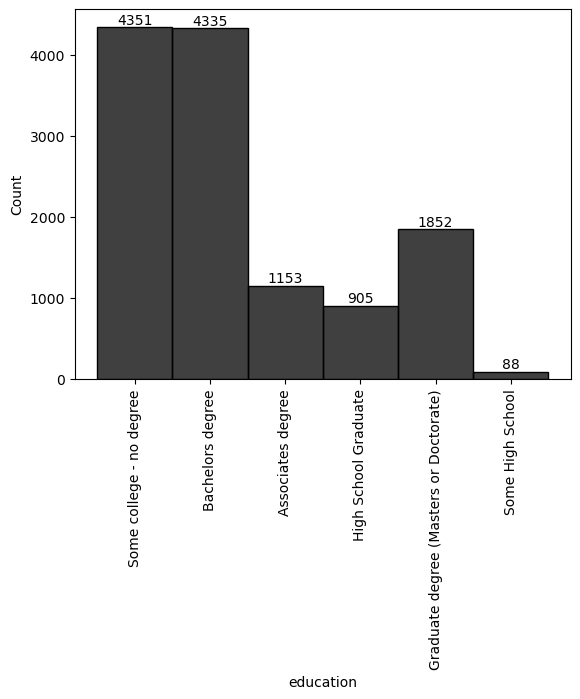

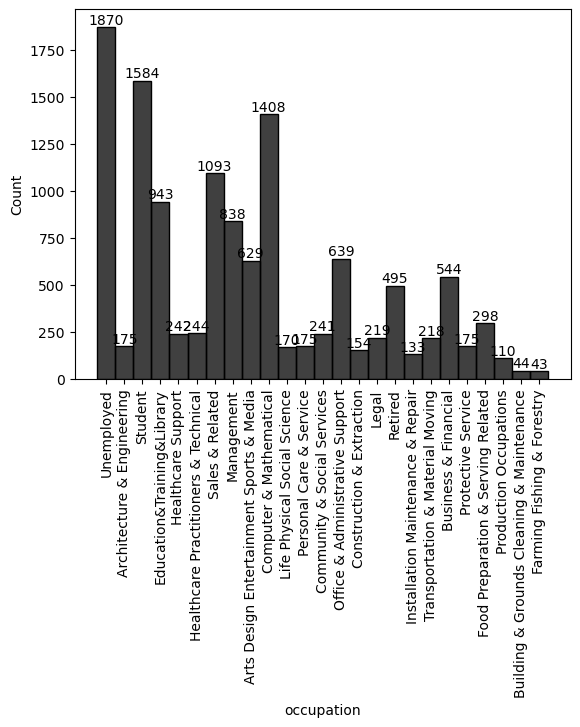

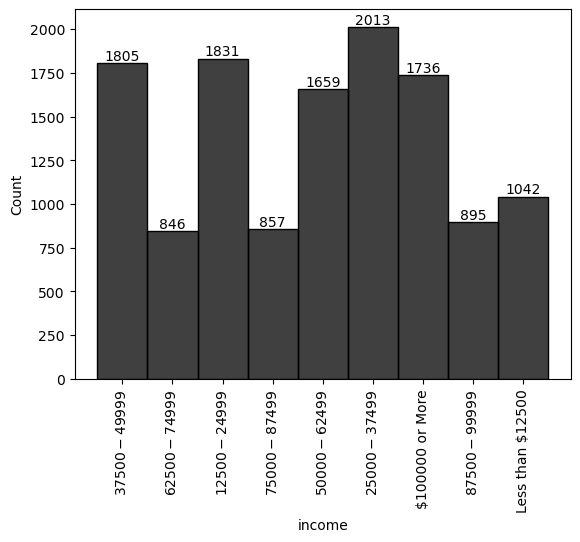

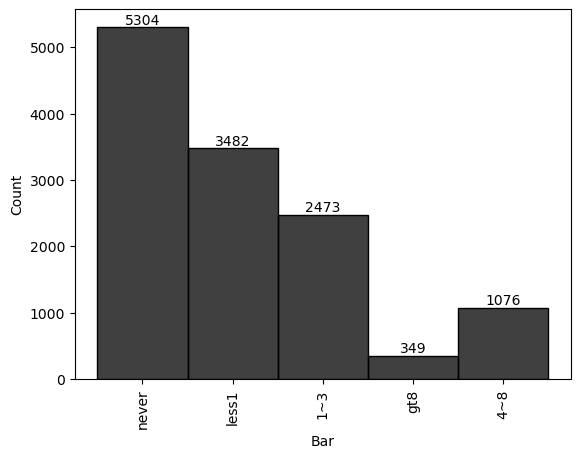

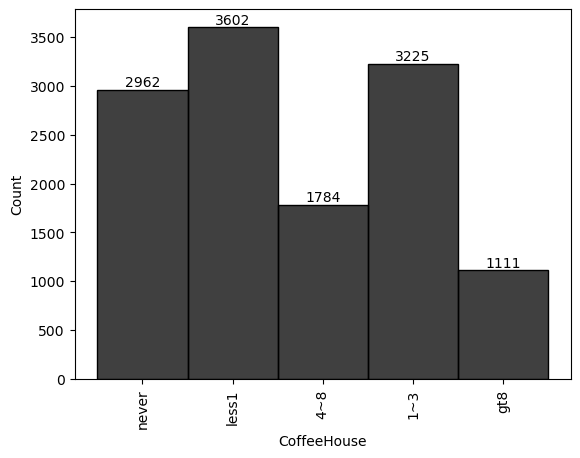

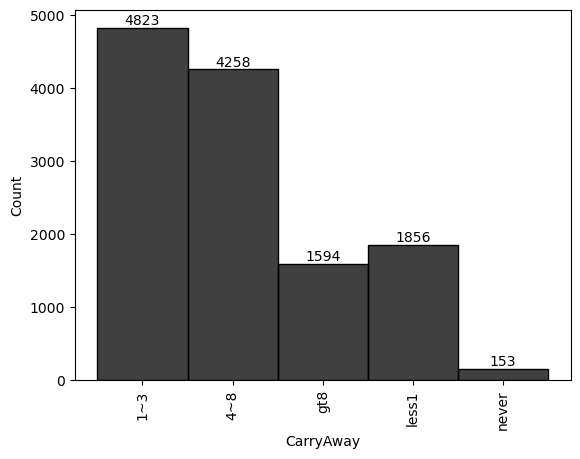

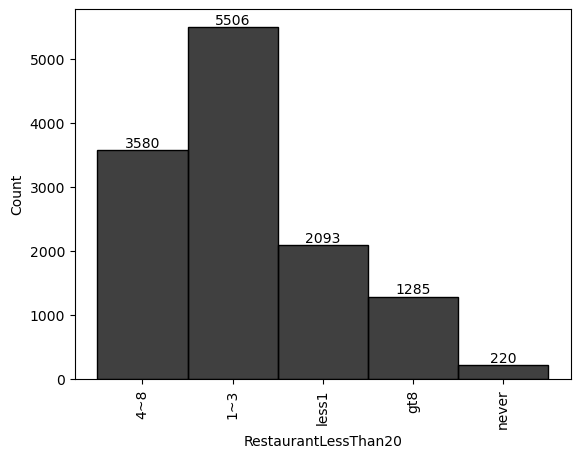

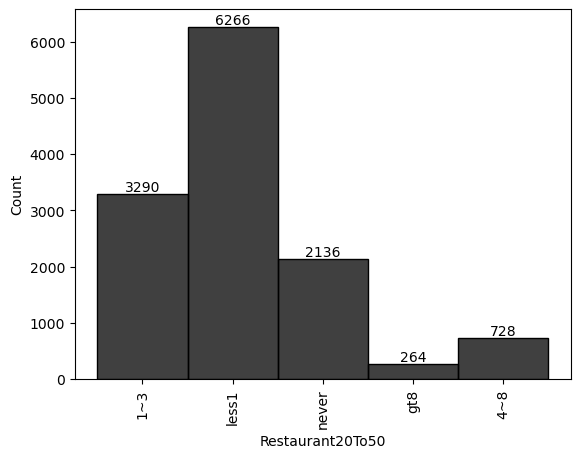

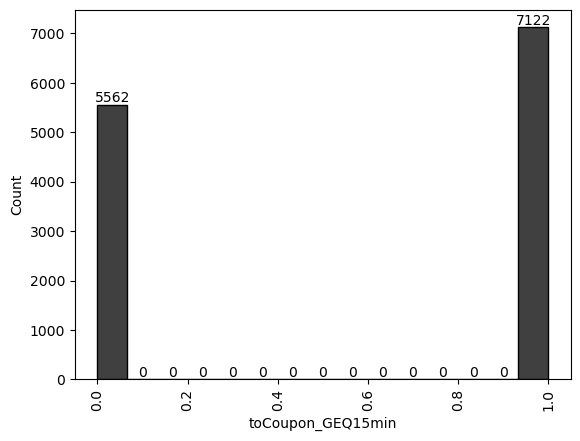

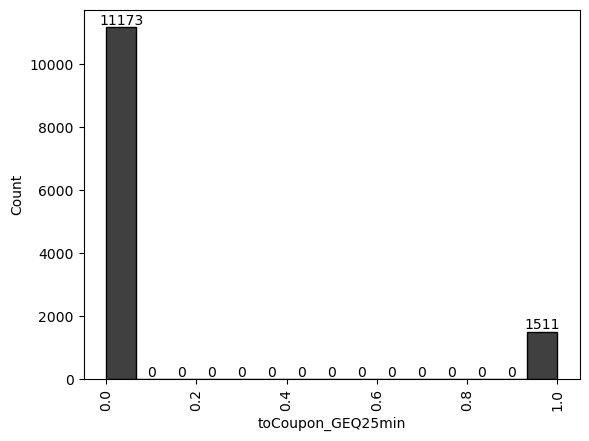

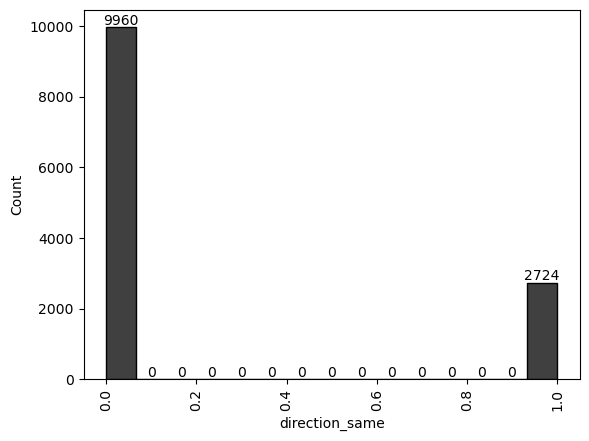

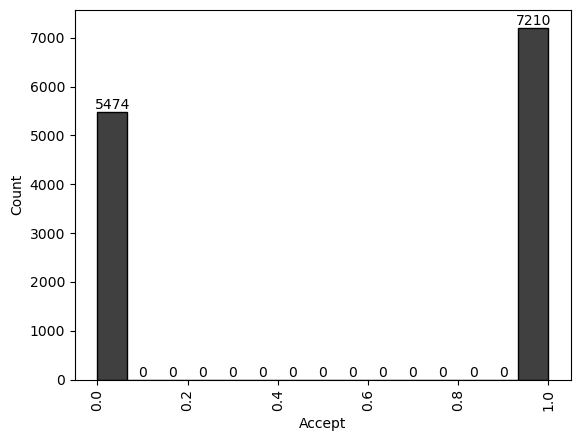

In [19]:
# to check the distribution of columns invidually 
for col in coupon_df.columns:
    ax = sns.histplot(coupon_df[col], color="black")
    for i in ax.containers:
      ax.bar_label(i)
    plt.setp(ax.get_xticklabels(), rotation=90) 
    plt.savefig(col+".jpg",bbox_inches="tight")
    plt.show()

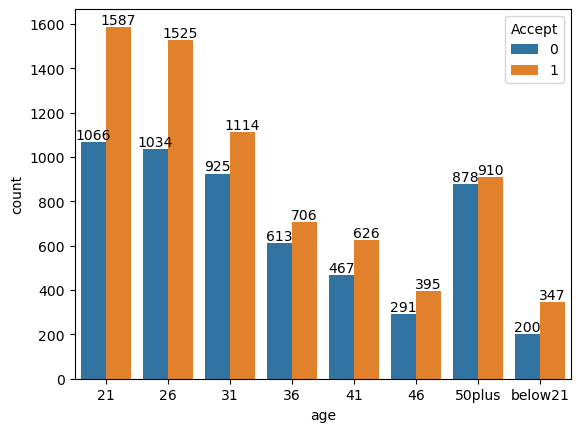

In [20]:
 age_df = coupon_df.groupby(by=["age","Accept"]).size().reset_index().rename(columns = {0:"count"})
  
 ax = sns.barplot(x="age",y="count",hue = "Accept" ,data=age_df)
 for i in ax.containers:
  ax.bar_label(i)
 plt.show() 
 # observation-  coupon acceptance ratio is more incase of age group below21

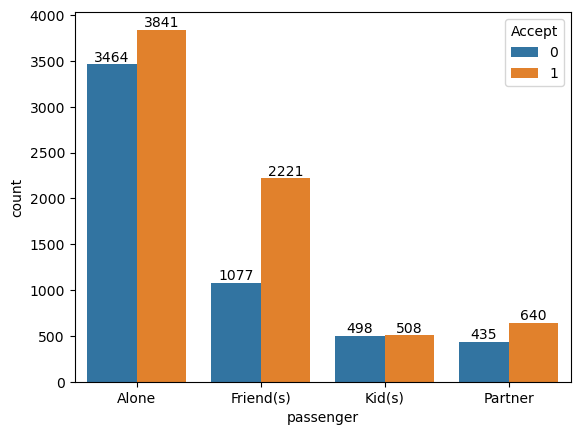

In [21]:
pas_df = coupon_df.groupby(by=["passenger","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax=sns.barplot(x ="passenger",y="count", hue="Accept",data=pas_df)
for i in ax.containers:
 ax.bar_label(i)
plt.show()
# observation - coupon acceptance ratio is more if the group is of "Friends"

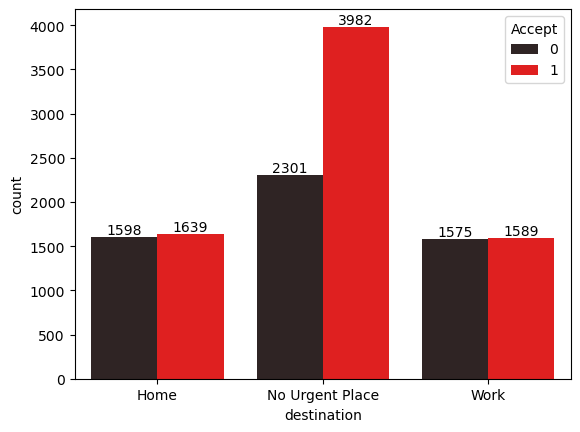

In [22]:
dest_df = coupon_df.groupby(by=["destination","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="destination",y="count",hue ="Accept",data=dest_df, color="red")
for i in ax.containers:
 ax.bar_label(i)
plt.show() 
# coupon acceptance ratio is high if a person's destination is "no urgent Place"

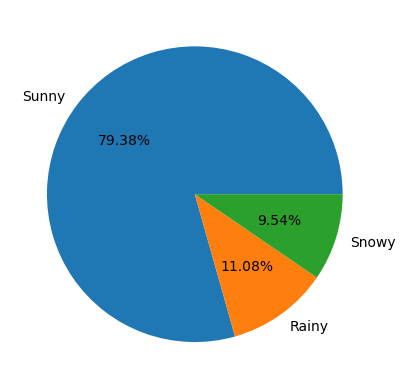

In [23]:
plt.pie(coupon_df["weather"].value_counts(),labels=coupon_df["weather"].unique(), autopct="%.2f%%")
plt.show()
# Nearly 80% of the weather data consists of Sunny days  

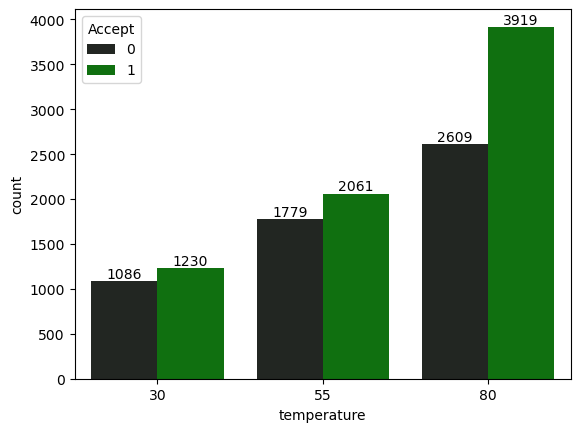

In [24]:
temp_df = coupon_df.groupby(by=["temperature","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="temperature",y="count", hue="Accept",data=temp_df, color="green")
for i in ax.containers:
 ax.bar_label(i)
plt.show() 
# observation -During high temperatures coupon acceptance ratio is high

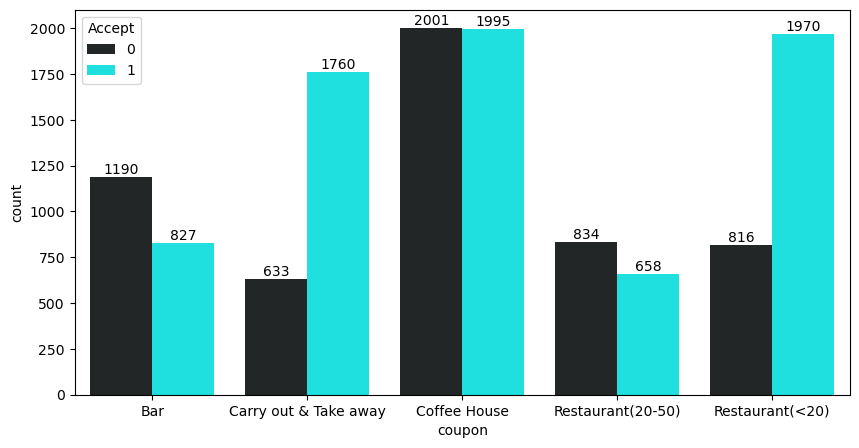

In [25]:
plt.figure(figsize=(10,5))
coup_df = coupon_df.groupby(by=["coupon","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="coupon",y="count", hue="Accept",data=coup_df, color="cyan")
for i in ax.containers:
 ax.bar_label(i)
plt.show() 
#observation- Carry out and take away highest number of coupon acceptance ratio and BAR is having least coupon acceptance ratio

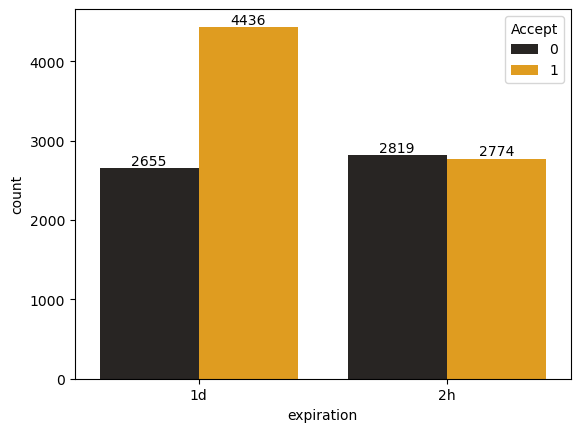

In [26]:
exp_df = coupon_df.groupby(by=["expiration","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="expiration",y="count", hue="Accept",data=exp_df, color="orange")
for i in ax.containers:
 ax.bar_label(i)
plt.show()
# observation- coupon with validity of 1 day is having high acceptance probability

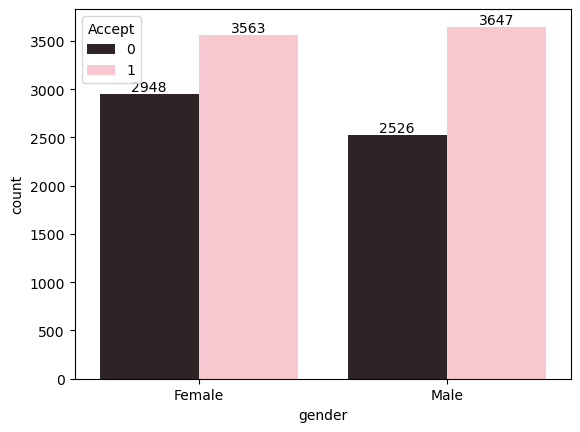

In [27]:
gen_df = coupon_df.groupby(by=["gender","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="gender",y="count", hue="Accept",data=gen_df, color="pink")
for i in ax.containers:
 ax.bar_label(i)
plt.show()
# observation- Male having higher number of coupon utilisation than female

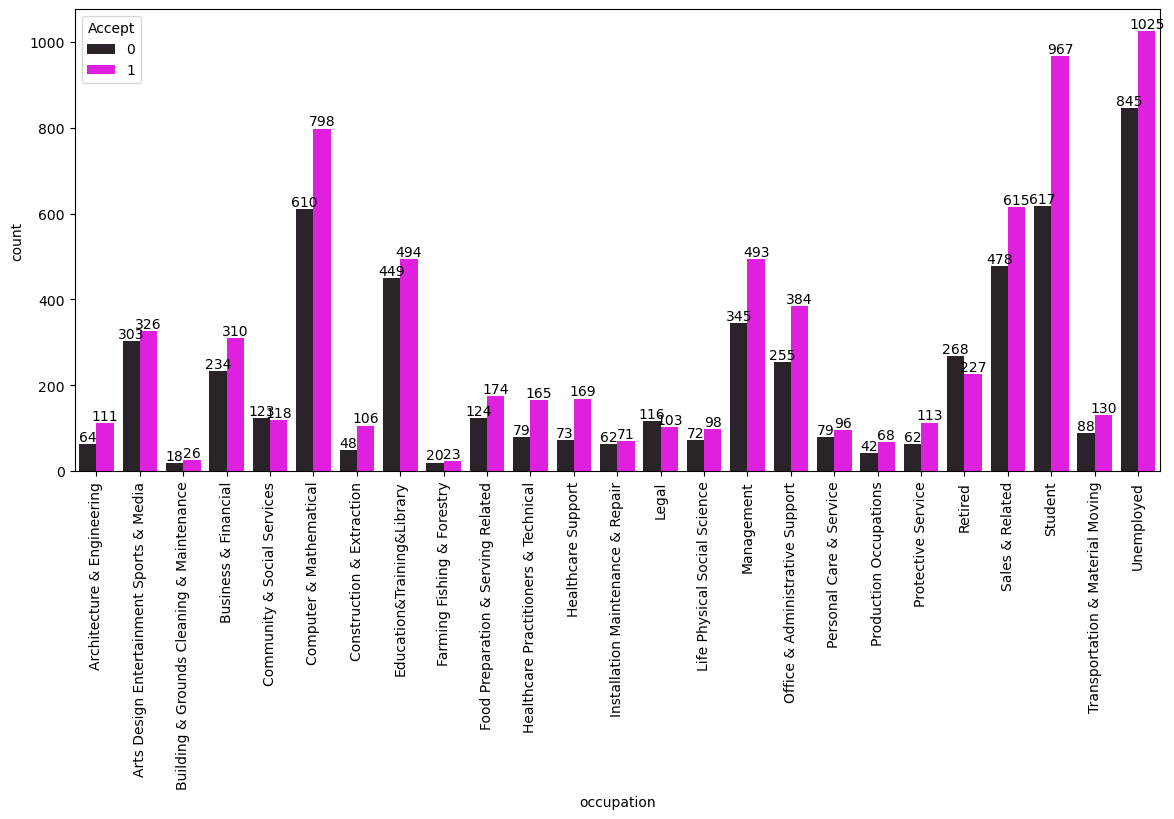

In [28]:
plt.figure(figsize=(14,6))
occ_df = coupon_df.groupby(by=["occupation","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="occupation",y="count", hue="Accept",data=occ_df, color="magenta")
for i in ax.containers:
 ax.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
# observation - it can be inferred from data set that Retired employees coupon acceptance percentage is low compare to other segments.
 

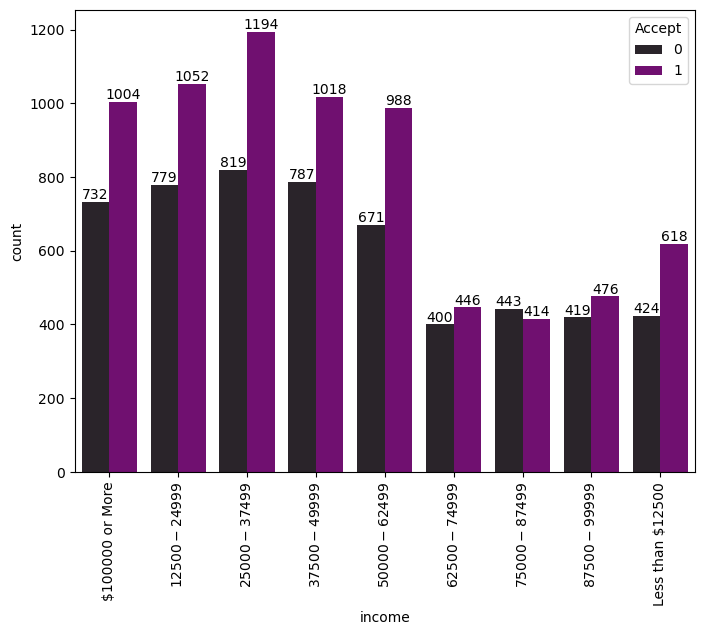

In [29]:
plt.figure(figsize=(8,6))
inc_df = coupon_df.groupby(by=["income","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="income",y="count", hue="Accept",data=inc_df, color="purple")
for i in ax.containers:
 ax.bar_label(i)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()
# observation-
# less income people availing high number of coupon

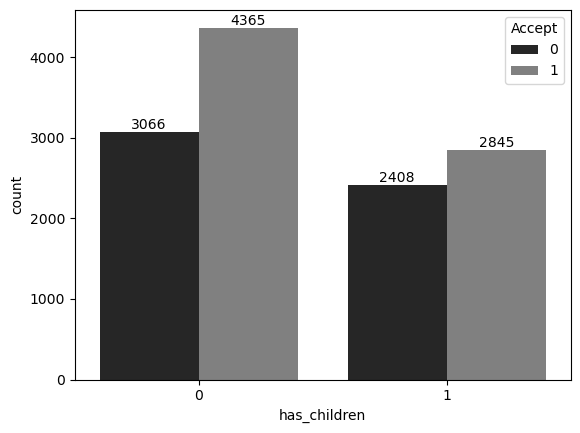

In [30]:
has_df = coupon_df.groupby(by=["has_children","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="has_children",y="count", hue="Accept",data=has_df, color="grey")
for i in ax.containers:
 ax.bar_label(i)
plt.show()
# observation
# people with children avail coupon percentage is low

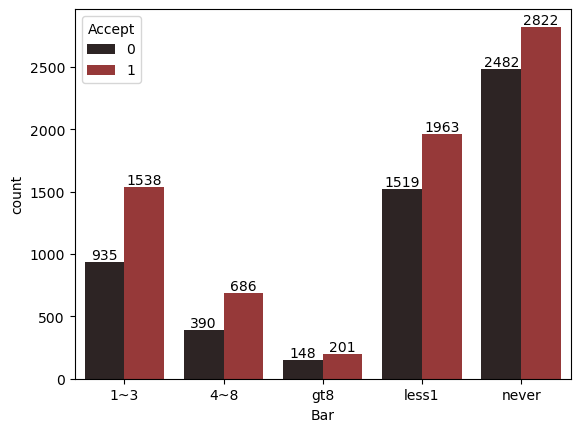

In [31]:
bar_df = coupon_df.groupby(by=["Bar","Accept"]).size().reset_index().rename(columns = {0:"count"})
ax = sns.barplot(x ="Bar",y="count", hue="Accept",data=bar_df, color="brown")
for i in ax.containers:
 ax.bar_label(i)
plt.show()
#observation-
# people who visits Bar between 1 to 3 times in a months is availing coupon more

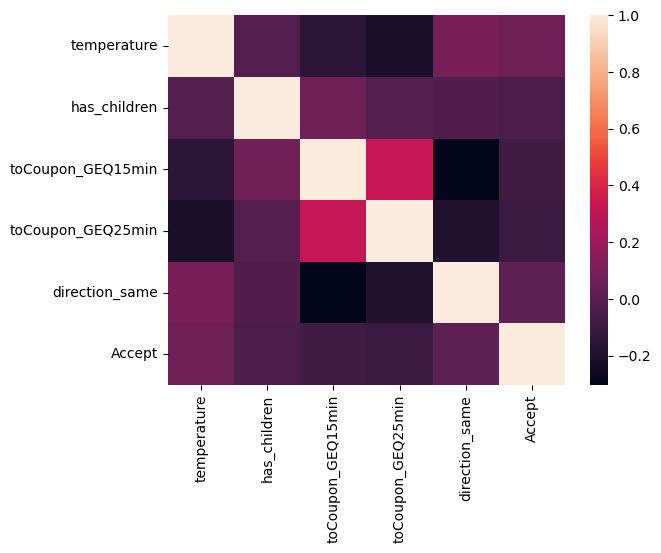

In [32]:
# heatmap for correlation
sns.heatmap(coupon_df.corr(numeric_only=True) );

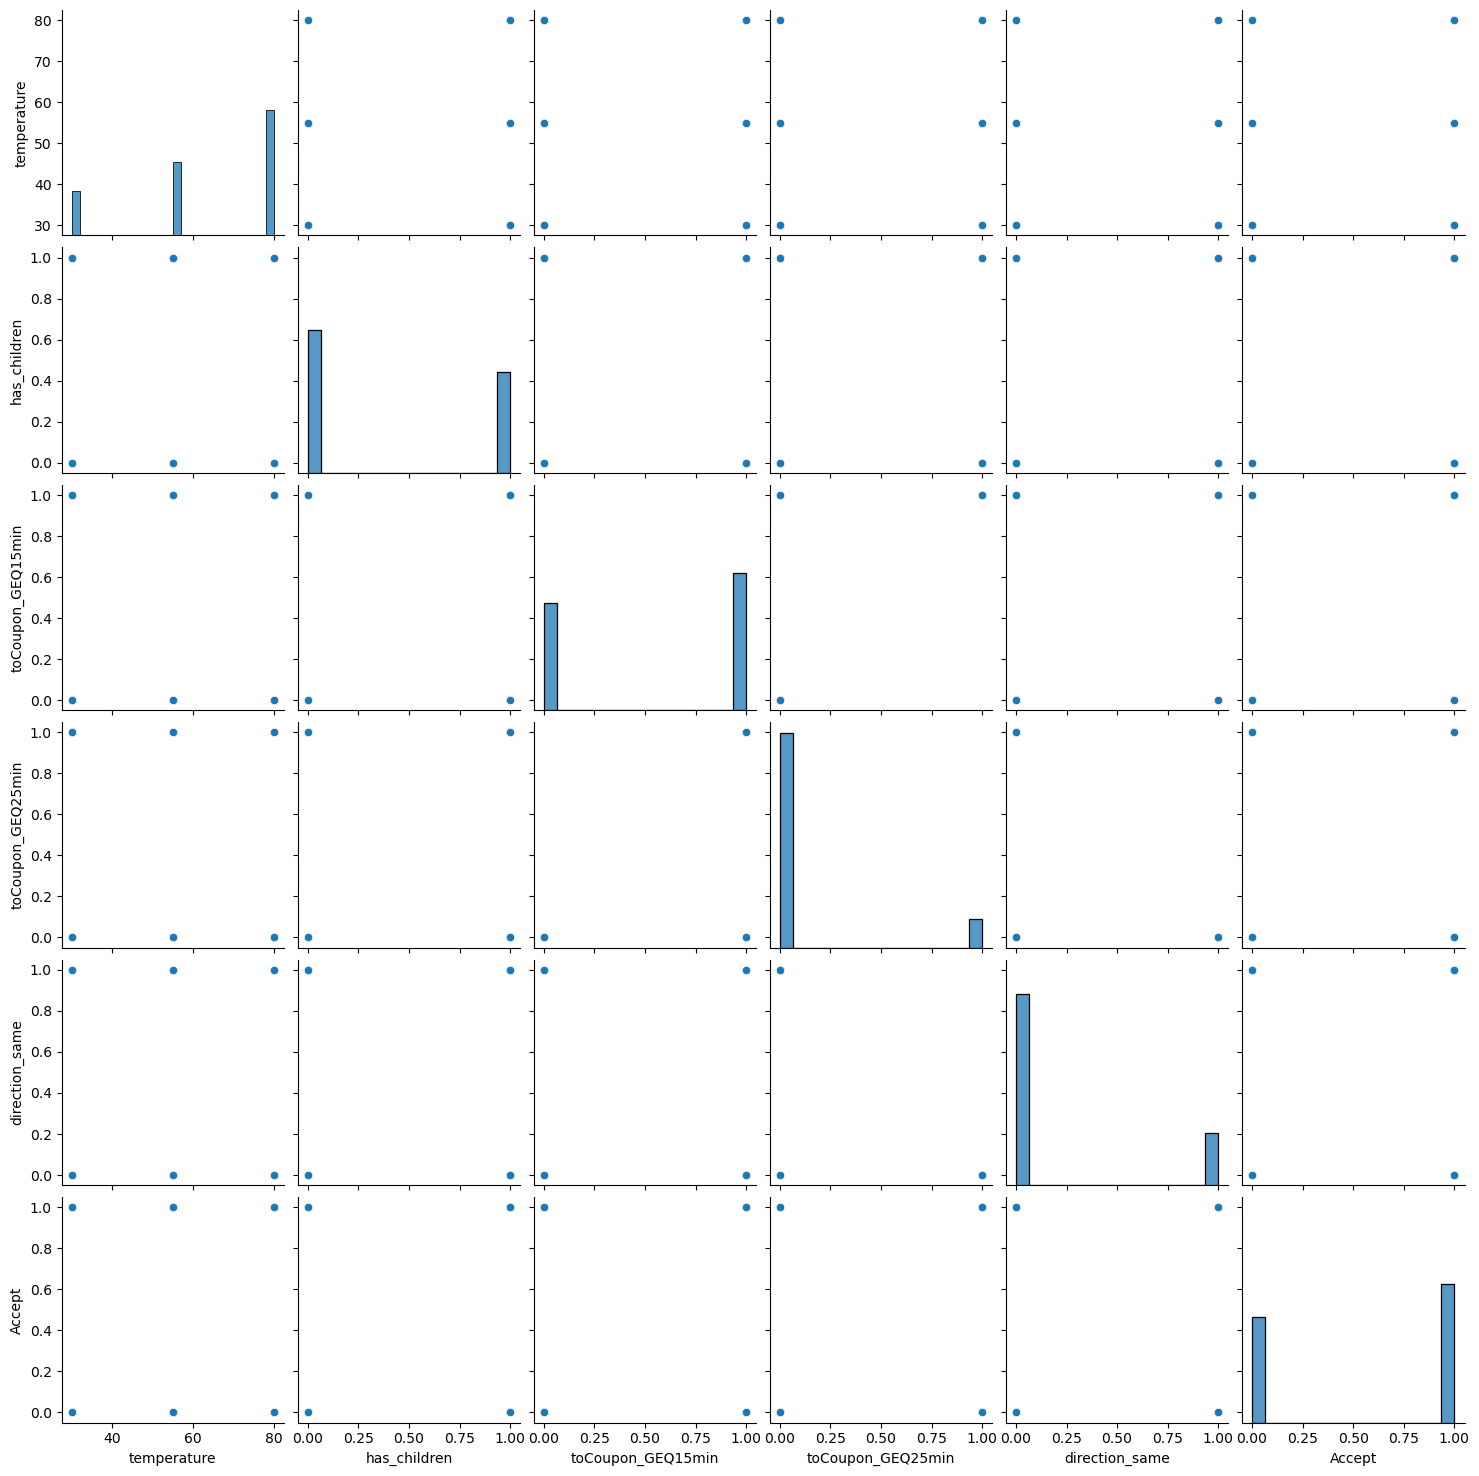

In [33]:
# To check pairwise relationship between numerical columns
sns.pairplot(coupon_df);


## Model Building

### 1-Model building without converting categorical features into numerical numbers

In [34]:
X = coupon_df.drop("Accept", axis=1)
y = coupon_df["Accept"]

In [35]:
# prepare train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=87)


In [36]:
cat_attribs = ["destination","passenger","weather","coupon","expiration","gender","age","maritalStatus","education","occupation",
               "income","Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50"]
X_train[cat_attribs] = X_train[cat_attribs].astype('category')
X_test[cat_attribs] = X_test[cat_attribs].astype('category')

In [37]:
# XGB Classifier

model_xgb= XGBClassifier(enable_categorical = True)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
print("Performance with  XGB classifier with categorical features")
print("Accuracy score  " , accuracy_score(y_test, y_pred))
print("Classification report \n", classification_report(y_test, y_pred))
print("Confusion matrix \n", confusion_matrix(y_test, y_pred))

Performance with  XGB classifier with categorical features
Accuracy score   0.7627118644067796
Classification report 
               precision    recall  f1-score   support

           0       0.74      0.69      0.72      1091
           1       0.78      0.81      0.80      1446

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.76      2537
weighted avg       0.76      0.76      0.76      2537

Confusion matrix 
 [[ 757  334]
 [ 268 1178]]


###  2-Model building with conversion of categorical features into numeric values


In [38]:
XX= pd.get_dummies(X, columns=cat_attribs, dtype=int, drop_first=True)

In [39]:
XX.head(2)

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_No Urgent Place,destination_Work,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Snowy,weather_Sunny,...,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0
1,80,1,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# splitting the dataset (all numerical) into train and test 
XX_train, XX_test , y_train, y_test = train_test_split(XX,y,test_size=0.20, random_state=87)

In [41]:
# define a function for model prediction

def model_prediction(model):
   
    model.fit(XX_train,y_train)
    y_predict = model.predict(XX_test)
    print(f"Performance with  {model}")
    print("Accuracy score  " , accuracy_score(y_test, y_predict))
    print("Classification report \n", classification_report(y_test, y_predict))
    print("Confusion matrix \n", confusion_matrix(y_test, y_predict))
    

In [42]:
# initialize different machine learning algorithm and call the model_prediction function
# Random Forest Classification
model = RandomForestClassifier()
model_prediction(model)

Performance with  RandomForestClassifier()
Accuracy score   0.762317698068585
Classification report 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71      1091
           1       0.77      0.83      0.80      1446

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.75      2537
weighted avg       0.76      0.76      0.76      2537

Confusion matrix 
 [[ 728  363]
 [ 240 1206]]


In [43]:
# Adaboost Classification
model = AdaBoostClassifier()
model_prediction(model)

Performance with  AdaBoostClassifier()
Accuracy score   0.6878202601497833
Classification report 
               precision    recall  f1-score   support

           0       0.66      0.56      0.61      1091
           1       0.70      0.79      0.74      1446

    accuracy                           0.69      2537
   macro avg       0.68      0.67      0.67      2537
weighted avg       0.69      0.69      0.68      2537

Confusion matrix 
 [[ 609  482]
 [ 310 1136]]


In [44]:
# logistic Regression 
model = LogisticRegression()
model_prediction(model)

Performance with  LogisticRegression()
Accuracy score   0.6791486007094995
Classification report 
               precision    recall  f1-score   support

           0       0.65      0.56      0.60      1091
           1       0.70      0.77      0.73      1446

    accuracy                           0.68      2537
   macro avg       0.67      0.66      0.67      2537
weighted avg       0.68      0.68      0.68      2537

Confusion matrix 
 [[ 607  484]
 [ 330 1116]]


In [45]:
# Support Vector classification 
model = SVC()
model_prediction(model)

Performance with  SVC()
Accuracy score   0.5699645250295625
Classification report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1091
           1       0.57      1.00      0.73      1446

    accuracy                           0.57      2537
   macro avg       0.28      0.50      0.36      2537
weighted avg       0.32      0.57      0.41      2537

Confusion matrix 
 [[   0 1091]
 [   0 1446]]


In [46]:
# K Nearest Neighbors
model = KNeighborsClassifier()
model_prediction(model)

Performance with  KNeighborsClassifier()
Accuracy score   0.6436736302719748
Classification report 
               precision    recall  f1-score   support

           0       0.59      0.56      0.58      1091
           1       0.68      0.71      0.69      1446

    accuracy                           0.64      2537
   macro avg       0.64      0.63      0.63      2537
weighted avg       0.64      0.64      0.64      2537

Confusion matrix 
 [[ 613  478]
 [ 426 1020]]


In [47]:
# Naive Bayes Classifier
model = GaussianNB()
model_prediction(model)

Performance with  GaussianNB()
Accuracy score   0.62238864800946
Classification report 
               precision    recall  f1-score   support

           0       0.55      0.64      0.59      1091
           1       0.69      0.61      0.65      1446

    accuracy                           0.62      2537
   macro avg       0.62      0.62      0.62      2537
weighted avg       0.63      0.62      0.62      2537

Confusion matrix 
 [[697 394]
 [564 882]]


In [48]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model_prediction(model)


Performance with  DecisionTreeClassifier()
Accuracy score   0.7098935750886874
Classification report 
               precision    recall  f1-score   support

           0       0.66      0.67      0.67      1091
           1       0.75      0.74      0.74      1446

    accuracy                           0.71      2537
   macro avg       0.70      0.71      0.70      2537
weighted avg       0.71      0.71      0.71      2537

Confusion matrix 
 [[ 734  357]
 [ 379 1067]]


### 3-Model Building with Hyperparameter Tuning

In [53]:
# Hyperparameter tuning with Random Forest Classifier
XX_train, XX_test , y_train, y_test = train_test_split(XX,y,test_size=0.20, random_state=87)
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}

model_rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=model_rf, param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=87,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(XX_train,y_train)

print(rf_randomcv.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 780,
 'criterion': 'gini'}

In [54]:
# Training the model with the best parameters obtained from Hyperparameter tuning with Randomized search
model_rf_bp = RandomForestClassifier(n_estimators=800, min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=780,criterion='gini')
model_prediction(model_rf_bp)

Performance with  RandomForestClassifier(max_depth=780, max_features='auto', n_estimators=800)
Accuracy score   0.767836026803311
Classification report 
               precision    recall  f1-score   support

           0       0.77      0.66      0.71      1091
           1       0.77      0.85      0.81      1446

    accuracy                           0.77      2537
   macro avg       0.77      0.75      0.76      2537
weighted avg       0.77      0.77      0.77      2537

Confusion matrix 
 [[ 723  368]
 [ 221 1225]]


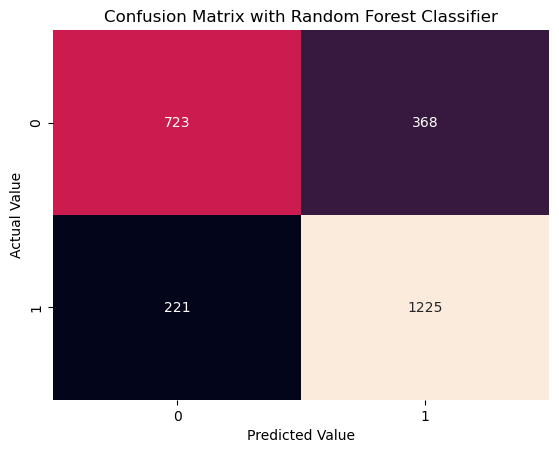

In [57]:
# visual representation of confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test, model_rf_bp.predict(XX_test)), annot= True, fmt='g', cbar=False)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Confusion Matrix with Random Forest Classifier")
plt.show()

In [58]:
# feature importance with Random Forest Classifier

important_features = pd.DataFrame({"Feature Name":XX_train.columns, "Importance Value in %": model_rf_bp.feature_importances_ *100} ).sort_values(by="Importance Value in %", ascending=False)
important_features

,Feature Name,Importance Value in %
16,expiration_2h,3.834259
0,temperature,3.671255
13,coupon_Coffee House,3.397419
15,coupon_Restaurant(<20),3.361727
12,coupon_Carry out & Take away,3.329077
...,...,...
51,occupation_Production Occupations,0.145895
28,maritalStatus_Widowed,0.144302
32,education_Some High School,0.103671
41,occupation_Farming Fishing & Forestry,0.080554


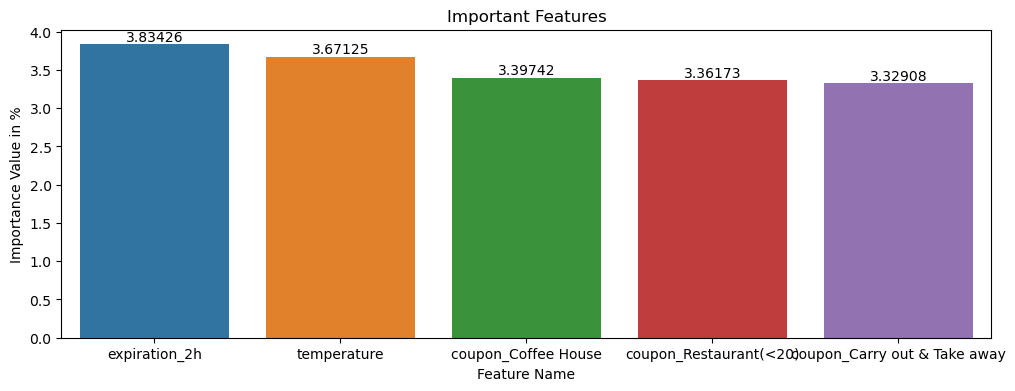

In [59]:
plt.figure(figsize=(12,4))
ax = sns.barplot(x= "Feature Name", y="Importance Value in %",hue="Feature Name", data= important_features[:5], orient='v')
for i in ax.containers:
    ax.bar_label(i)
plt.title("Important Features")    
plt.show()


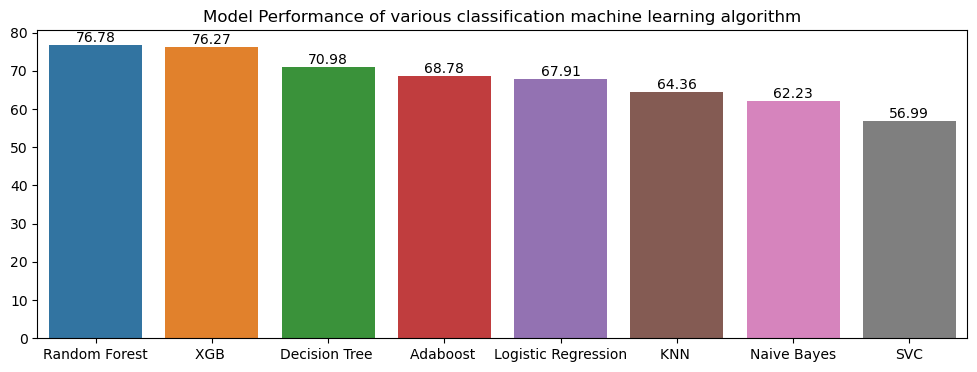

In [60]:
Model_performance_dict = {"Random Forest" : 76.78,
                          "XGB " : 76.27,
                          "Decision Tree ": 70.98,
                          "Adaboost ": 68.78,
                          "Logistic Regression":67.91,
                          "KNN ": 64.36,
                          "Naive Bayes" : 62.23,
                          "SVC":56.99
                         }

plt.figure(figsize=(12,4))
ax = sns.barplot(x= Model_performance_dict.keys(), y=Model_performance_dict.values(),hue=Model_performance_dict.keys(), data= Model_performance_dict)
for i in ax.containers:
    ax.bar_label(i)
plt.title("Model Performance of various classification machine learning algorithm")    
plt.show()


In [62]:
# save the model 
pickle.dump(model_rf_bp, open("coupon_rf_model.pkl","wb"))
